# Barotropic Model #

Here will will use pyqg to reproduce the results of the paper: <br />
J. C. Mcwilliams (1984). The emergence of isolated coherent vortices in turbulent flow. Journal of Fluid Mechanics, 146, pp 21-43 [doi:10.1017/S0022112084001750](http://dx.doi.org/10.1017/S0022112084001750)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyqg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 22 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 22 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 22 days


McWilliams performed freely-evolving 2D turbulence ($R_d = \infty$, $\beta =0$) experiments on a $2\pi\times 2\pi$ periodic box.

In [2]:
# create the model object
m = pyqg.BTModel(L=2.*np.pi, nx=256, 
                 beta=0., H=1., rek=0., rd=None,
                 tmax=40, dt=0.001, taveint=1,
                 ntd=4)
# in this example we used ntd=4, four threads
# if your machine has more (or fewer) cores available, you could try changing it

INFO:pyqg.model: Logger initialized
INFO:pyqg.model: Kernel initialized


## Initial condition
The initial condition is random, with a prescribed spectrum
$$
|\hat{\psi}|^2 = A \,\kappa^{-1}\left[1 + \left(\frac{\kappa}{6}\right)^4\right]^{-1}\,,
$$
where $\kappa$ is the wavenumber magnitude. The constant A is determined so that the initial energy is $KE = 0.5$.

In [3]:
# generate McWilliams 84 IC condition

fk = m.wv != 0
ckappa = np.zeros_like(m.wv2)
ckappa[fk] = np.sqrt( m.wv2[fk]*(1. + (m.wv2[fk]/36.)**2) )**-1

nhx,nhy = m.wv2.shape

Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa

Pi = m.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()
Pi_hat = m.fft( Pi )
KEaux = m.spec_var( m.wv*Pi_hat )

pih = ( Pi_hat/np.sqrt(KEaux) )
qih = -m.wv2*pih
qi = m.ifft(qih)

In [4]:
# initialize the model with that initial condition
m.set_q(qi)

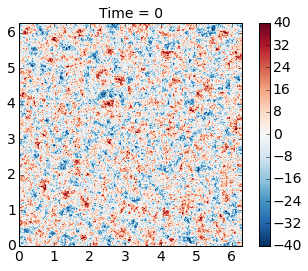

In [5]:
# define a quick function for plotting and visualize the initial condition
def plot_q(m, qmax=40):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    pc.set_clim([-qmax, qmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

plot_q(m)

## Runing the model

Here we demonstrate how to use the ``run_with_snapshots`` feature to periodically stop the model and perform some action (in this case, visualization).

INFO:pyqg.model: Step: 1000, Time: 1.000000e+00, KE: 4.963814e-01, CFL: 0.095214
INFO:pyqg.model: Step: 2000, Time: 2.000000e+00, KE: 4.949169e-01, CFL: 0.104936
INFO:pyqg.model: Step: 3000, Time: 3.000000e+00, KE: 4.940636e-01, CFL: 0.097894
INFO:pyqg.model: Step: 4000, Time: 4.000000e+00, KE: 4.935508e-01, CFL: 0.096529
INFO:pyqg.model: Step: 5000, Time: 5.000000e+00, KE: 4.932417e-01, CFL: 0.093920
INFO:pyqg.model: Step: 6000, Time: 6.000000e+00, KE: 4.930396e-01, CFL: 0.107017
INFO:pyqg.model: Step: 7000, Time: 7.000000e+00, KE: 4.928895e-01, CFL: 0.098470
INFO:pyqg.model: Step: 8000, Time: 8.000000e+00, KE: 4.927662e-01, CFL: 0.103304
INFO:pyqg.model: Step: 9000, Time: 9.000000e+00, KE: 4.926710e-01, CFL: 0.098935


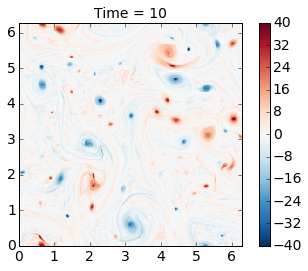

INFO:pyqg.model: Step: 10000, Time: 1.000000e+01, KE: 4.925855e-01, CFL: 0.098707
INFO:pyqg.model: Step: 11000, Time: 1.100000e+01, KE: 4.925028e-01, CFL: 0.090715
INFO:pyqg.model: Step: 12000, Time: 1.200000e+01, KE: 4.924460e-01, CFL: 0.103829
INFO:pyqg.model: Step: 13000, Time: 1.300000e+01, KE: 4.923964e-01, CFL: 0.116610
INFO:pyqg.model: Step: 14000, Time: 1.400000e+01, KE: 4.923517e-01, CFL: 0.108627
INFO:pyqg.model: Step: 15000, Time: 1.500000e+01, KE: 4.923049e-01, CFL: 0.102183
INFO:pyqg.model: Step: 16000, Time: 1.600000e+01, KE: 4.922733e-01, CFL: 0.114245
INFO:pyqg.model: Step: 17000, Time: 1.700000e+01, KE: 4.922465e-01, CFL: 0.089848
INFO:pyqg.model: Step: 18000, Time: 1.800000e+01, KE: 4.922237e-01, CFL: 0.097016
INFO:pyqg.model: Step: 19000, Time: 1.900000e+01, KE: 4.922071e-01, CFL: 0.093745


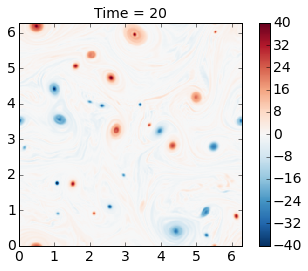

INFO:pyqg.model: Step: 20000, Time: 2.000000e+01, KE: 4.921923e-01, CFL: 0.099063
INFO:pyqg.model: Step: 21000, Time: 2.100000e+01, KE: 4.921815e-01, CFL: 0.104020
INFO:pyqg.model: Step: 22000, Time: 2.200000e+01, KE: 4.921718e-01, CFL: 0.102643
INFO:pyqg.model: Step: 23000, Time: 2.300000e+01, KE: 4.921582e-01, CFL: 0.098369
INFO:pyqg.model: Step: 24000, Time: 2.400000e+01, KE: 4.921422e-01, CFL: 0.088358
INFO:pyqg.model: Step: 25000, Time: 2.500000e+01, KE: 4.921277e-01, CFL: 0.097216
INFO:pyqg.model: Step: 26000, Time: 2.600000e+01, KE: 4.921137e-01, CFL: 0.104319
INFO:pyqg.model: Step: 27000, Time: 2.700000e+01, KE: 4.921033e-01, CFL: 0.100287
INFO:pyqg.model: Step: 28000, Time: 2.800000e+01, KE: 4.920929e-01, CFL: 0.097423
INFO:pyqg.model: Step: 29000, Time: 2.900000e+01, KE: 4.920763e-01, CFL: 0.094703


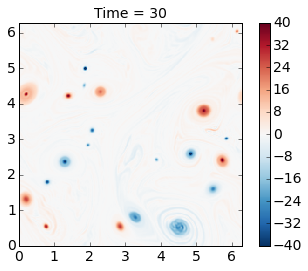

INFO:pyqg.model: Step: 30000, Time: 3.000000e+01, KE: 4.920669e-01, CFL: 0.099412
INFO:pyqg.model: Step: 31000, Time: 3.100000e+01, KE: 4.920611e-01, CFL: 0.134149
INFO:pyqg.model: Step: 32000, Time: 3.200000e+01, KE: 4.920555e-01, CFL: 0.102251
INFO:pyqg.model: Step: 33000, Time: 3.300000e+01, KE: 4.920483e-01, CFL: 0.101859
INFO:pyqg.model: Step: 34000, Time: 3.400000e+01, KE: 4.920385e-01, CFL: 0.101645
INFO:pyqg.model: Step: 35000, Time: 3.500000e+01, KE: 4.920314e-01, CFL: 0.101643
INFO:pyqg.model: Step: 36000, Time: 3.600000e+01, KE: 4.920235e-01, CFL: 0.111641
INFO:pyqg.model: Step: 37000, Time: 3.700000e+01, KE: 4.920152e-01, CFL: 0.104401
INFO:pyqg.model: Step: 38000, Time: 3.800000e+01, KE: 4.920084e-01, CFL: 0.099962
INFO:pyqg.model: Step: 39000, Time: 3.900000e+01, KE: 4.920012e-01, CFL: 0.101605


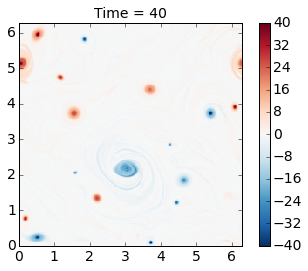

INFO:pyqg.model: Step: 40000, Time: 4.000000e+01, KE: 4.919920e-01, CFL: 0.114258


In [6]:
for _ in m.run_with_snapshots(tsnapstart=0, tsnapint=10):
    plot_q(m)

The genius of McWilliams (1984) was that he showed that the initial random vorticity field organizes itself into strong coherent vortices. This is true in significant part of the parameter space. This was previously suspected but unproven, mainly because people did not have computer resources to run the simulation long enough. Thirty years later we can perform such simulations in a couple of minutes on a laptop!

Also, note that the energy is nearly conserved, as it should be, and this is a nice test of the model.

## Plotting spectra

In [7]:
energy = m.get_diagnostic('KEspec')
enstrophy = m.get_diagnostic('Ensspec')

In [8]:
# this makes it easy to calculate an isotropic spectrum
from pyqg import diagnostic_tools as tools
kr, energy_iso = tools.calc_ispec(m,energy.squeeze())
_, enstrophy_iso = tools.calc_ispec(m,enstrophy.squeeze())

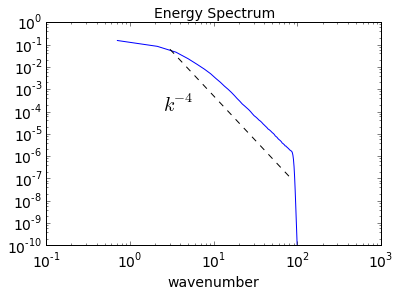

In [9]:
ks = np.array([3.,80])
es = 5*ks**-4
plt.loglog(kr,energy_iso)
plt.loglog(ks,es,'k--')
plt.text(2.5,.0001,r'$k^{-4}$',fontsize=20)
plt.ylim(1.e-10,1.e0)
plt.xlabel('wavenumber')
plt.title('Energy Spectrum')

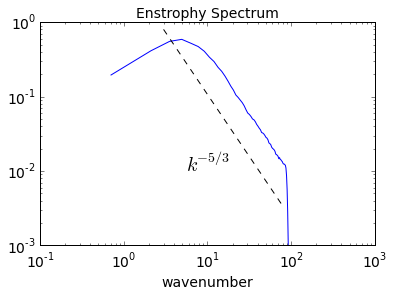

In [10]:
ks = np.array([3.,80])
es = 5*ks**(-5./3)
plt.loglog(kr,enstrophy_iso)
plt.loglog(ks,es,'k--')
plt.text(5.5,.01,r'$k^{-5/3}$',fontsize=20)
plt.ylim(1.e-3,1.e0)
plt.xlabel('wavenumber')
plt.title('Enstrophy Spectrum')